# Exploratory Data Analysis with Pandas (part 2)

Let us continue with the exploratory data analysis with Pandas. We will continue with the titanic dataset. So, load the titanic dataset and remember its structure.

In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh
import tensorflow as tf
from tensorflow.keras import layers

pandas_bokeh.output_notebook()
%matplotlib inline

2023-04-17 13:51:46.146594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading BokehJS ...

## Data visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

Let us see how we can use data visualization to explore the titanic dataset.

### Line plot

Line plots are useful to visualize the trend of a numerical column, usually, over time. We can use the `plot()` with the `kind='line'` argument from Pandas to visualize the trend of a numerical column.

Since the Titanic dataset does not have a time column, we will use the Covid dataset to visualize the trend of the number of confirmed cases over time. The data is available at the "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" (https://github.com/CSSEGISandData/COVID-19)

In [2]:
# url with the data
url_confirmed= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_covid_all = pd.read_csv(url_confirmed, header=0)
df_covid_all.head()
#df[['age', 'sibsp', 'parch']].sort_values(by='age').set_index('age').plot(kind='line')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [3]:
# select some countries
mask = df_covid_all['Country/Region'].isin(['Portugal', 'Spain', 'Italy', 'France', 'Germany', 'United Kingdom'])

# group by country and sum the values, drop the lat and long columns, and transpose the dataframe
df_covid = df_covid_all[mask] \
    .drop(['Lat', 'Long', 'Province/State'], axis=1) \
    .groupby('Country/Region').sum()\
    .T

# set the index to datetime
df_covid.set_index(pd.to_datetime(df_covid.index, format='%m/%d/%y'), inplace=True)

df_covid.head()

Country/Region,France,Germany,Italy,Portugal,Spain,United Kingdom
2020-01-22,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0
2020-01-24,2,0,0,0,0,0
2020-01-25,3,0,0,0,0,0
2020-01-26,3,0,0,0,0,0


<Axes: >

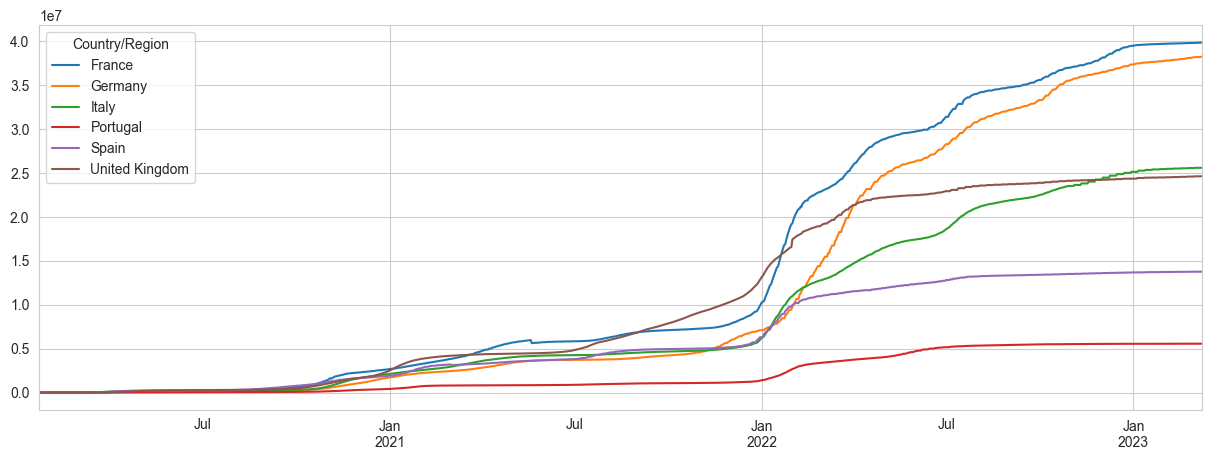

In [4]:
df_covid.plot(kind='line', figsize=(15, 5))

<Axes: >

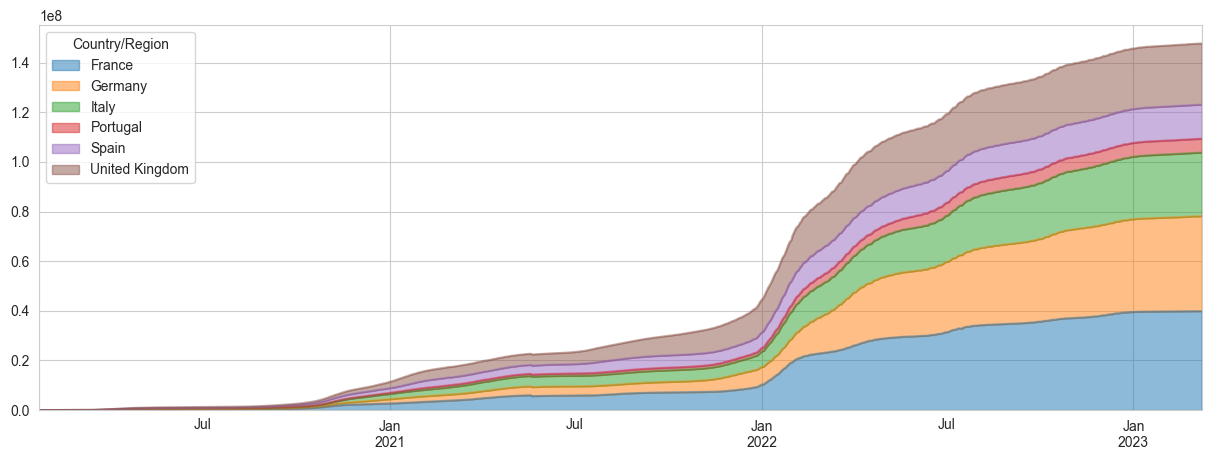

In [5]:
df_covid.plot(kind='area', figsize=(15, 5), alpha=0.5)

In [6]:
df_covid.plot_bokeh(figsize=(800, 400), title='COVID-19')

Figure(id='1003', ...)

In [7]:
df_covid.plot_bokeh(figsize=(800, 400), kind='area', title='COVID-19')

Figure(id='1450', ...)

### Scatter plot

A scatter plot is useful to visualize the relationship between two numerical columns. We can use the `plot()` with the `kind='scatter'` argument from Pandas to visualize the relationship between two numerical columns.

Let us return to the Titanic dataset and visualize the relationship between the age and the number of siblings and spouses aboard the Titanic.

In [8]:
df_titanic = pd.read_excel('./data/titanic/Titanic.xls')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY"


<Axes: xlabel='age', ylabel='sibsp'>

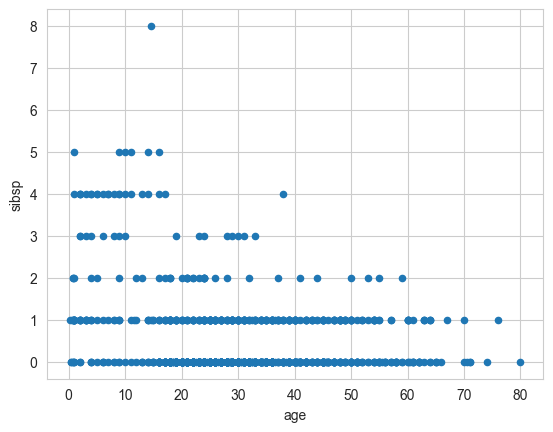

In [9]:
df_titanic.plot(kind='scatter', x='age', y='sibsp')

### Pie chart and donut chart

Pie charts are useful to visualize the distribution of a categorical column. We can use the `plot()` with the `kind='pie'` argument from Pandas.

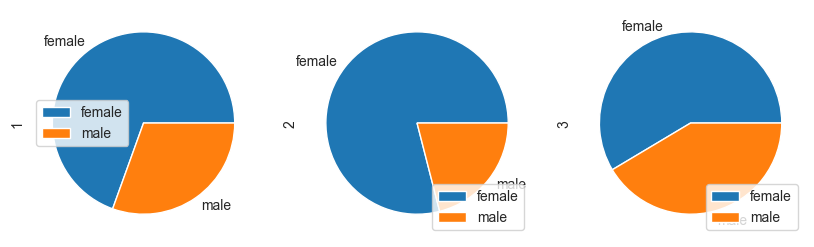

In [10]:
ax = df_titanic.pivot_table(index='sex',
               values='survived',
               columns='pclass',
               aggfunc='sum').plot(kind='pie', subplots=True, figsize=(10, 10))

### Histograms
We already have seen how to visualize the distribution of a numerical column using the `hist()` method from Pandas. We can also use the `hist()` method from Seaborn to visualize the distribution of a numerical column.


Text(0.5, 1.0, 'Age distribution')

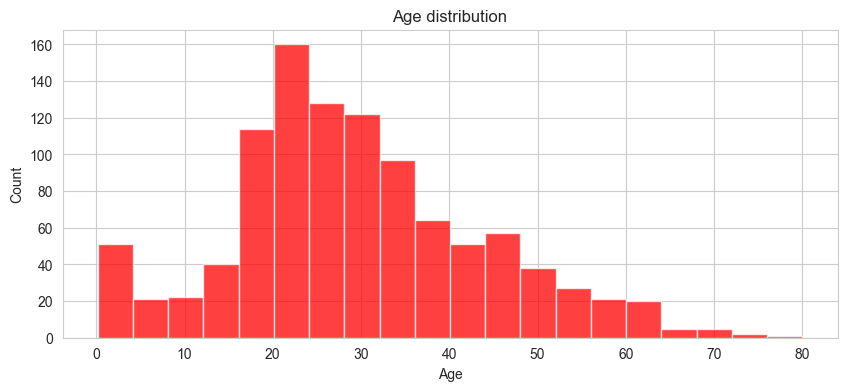

In [11]:
ax = df_titanic['age'].hist(alpha=0.75, bins=20, figsize=(10, 4), color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age distribution')

Seaborn also provides the `histplot()` method to visualize the distribution of a numerical column, but with more options.
(https://seaborn.pydata.org/generated/seaborn.histplot.html)

<Axes: xlabel='age', ylabel='Count'>

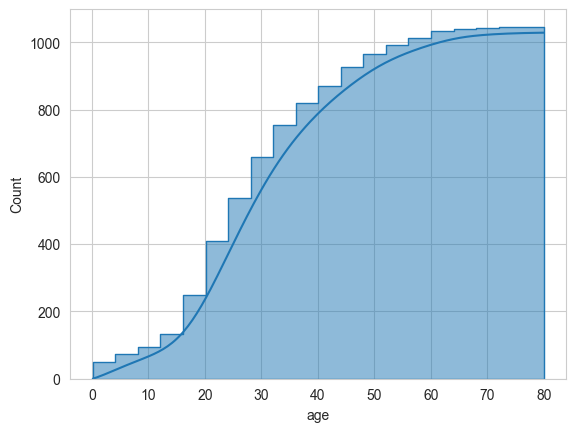

In [12]:
sns.histplot(data=df_titanic[['age']].dropna(), x='age', cumulative=True, bins=20, kde=True, element='step')

### Bar plot

Bar plots are useful to visualize the distribution of a categorical column. We can use the `plot()` with the `kind='bar'` argument from Pandas.

<Axes: xlabel='sex'>

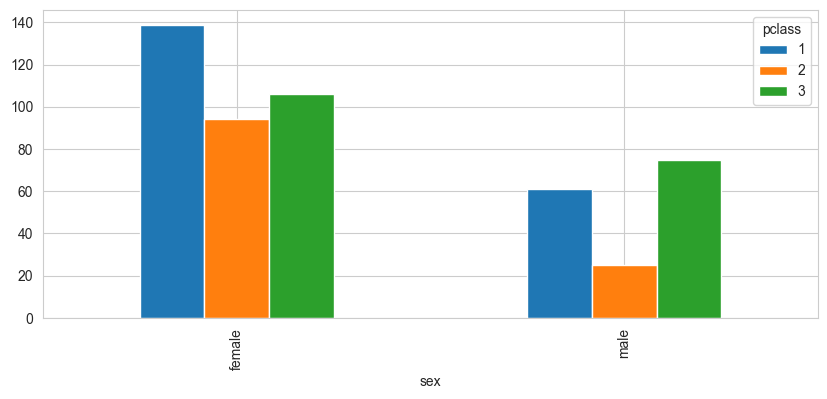

In [13]:
df_titanic.pivot_table(index='sex',
                                  values='survived',
                                  columns='pclass',
                                  aggfunc='sum').plot(kind='bar', figsize=(10, 4))

<Axes: ylabel='sex'>

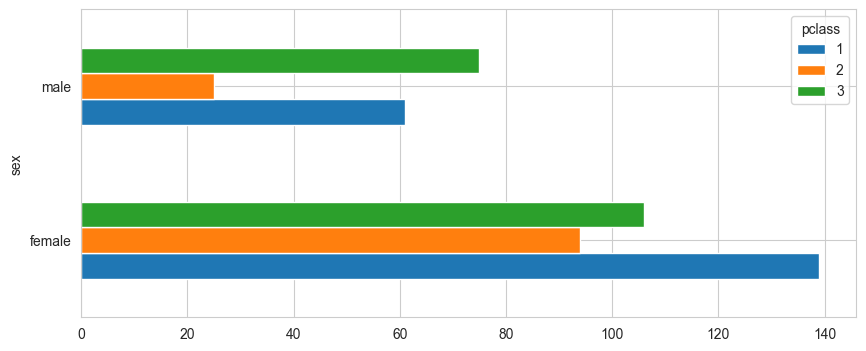

In [14]:
df_titanic.pivot_table(index='sex',
                       values='survived',
                       columns='pclass',
                       aggfunc='sum').plot(kind='barh', figsize=(10, 4))

### Box plot

Box plots are useful to visualize the distribution of a numerical column. We can use the `boxplot()` method from Pandas.

<Axes: >

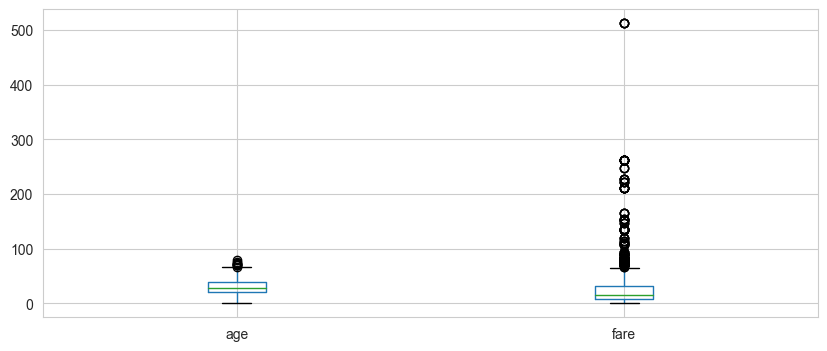

In [15]:
df_titanic[['age', 'fare']].boxplot(figsize=(10, 4))

The seaborn library also provides the `boxplot()` method to visualize the distribution of a numerical column.

<Axes: xlabel='pclass', ylabel='age'>

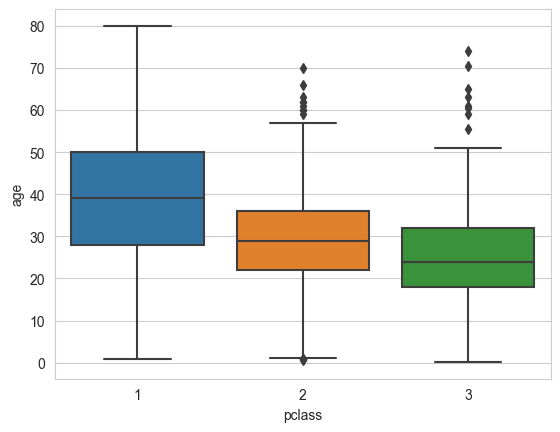

In [16]:
sns.boxplot(data=df_titanic, x='pclass', y='age')

### Kernel density estimation (KDE)
Kernel density estimation is a non-parametric approach to estimating the distribution of data. Instead of assuming a particular distribution, we use a continuous representation of the data. For example, let's say we have a set of data measurements but we don't know their underlying distribution. We can use a Gaussian kernel to estimate the density around the data. If we apply this to a set of random data generated by a bimodal normal distribution, we can obtain an estimate of the distribution by summing the kernels.

We can use the `kdeplot()` method from Seaborn.

<Axes: xlabel='age', ylabel='Density'>

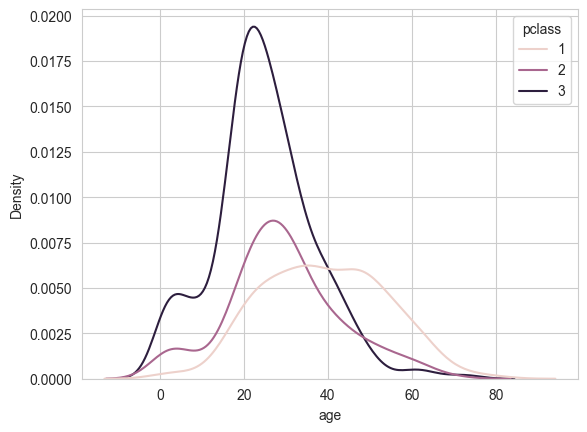

In [17]:
sns.kdeplot(data=df_titanic, x='age', hue='pclass')

In [18]:
# not working on pandas 2.0.0?
# df_titanic[['age']].dropna().plot.kde(figsize=(10, 4))

### Violin plot

Violin plots are useful to visualize the distribution of a numerical column. Violin plots are similar to box plots, but they also show the probability density of the data at different values.

We can use the `violinplot()` method from Seaborn.

<Axes: xlabel='pclass', ylabel='age'>

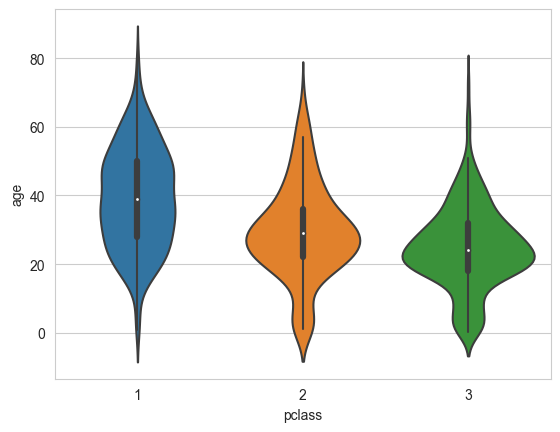

In [19]:
sns.violinplot(data=df_titanic, x='pclass', y='age')

### Heatmap

Heatmaps are useful to visualize the correlation between numerical columns. We can use the `heatmap()` method from Seaborn.

<Axes: >

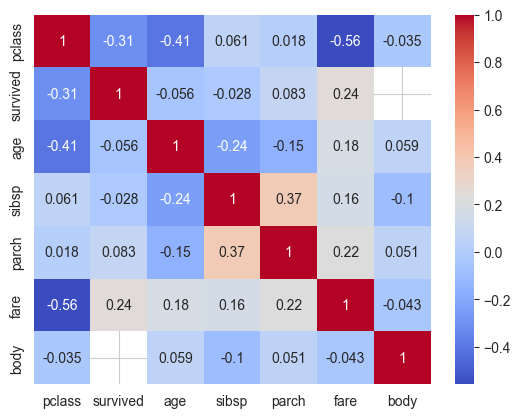

In [20]:
# numerical columns
numerical_columns = df_titanic.select_dtypes(include=np.number).columns

sns.heatmap(df_titanic[numerical_columns].corr(), annot=True, cmap='coolwarm')

### Pairplot

Pairplots are useful to visualize the relationship between multiple numerical columns. We can use the `pairplot()` method from Seaborn. Several options are available to customize the pairplot, try some of them changing the `kind` and `diag_kind` arguments.

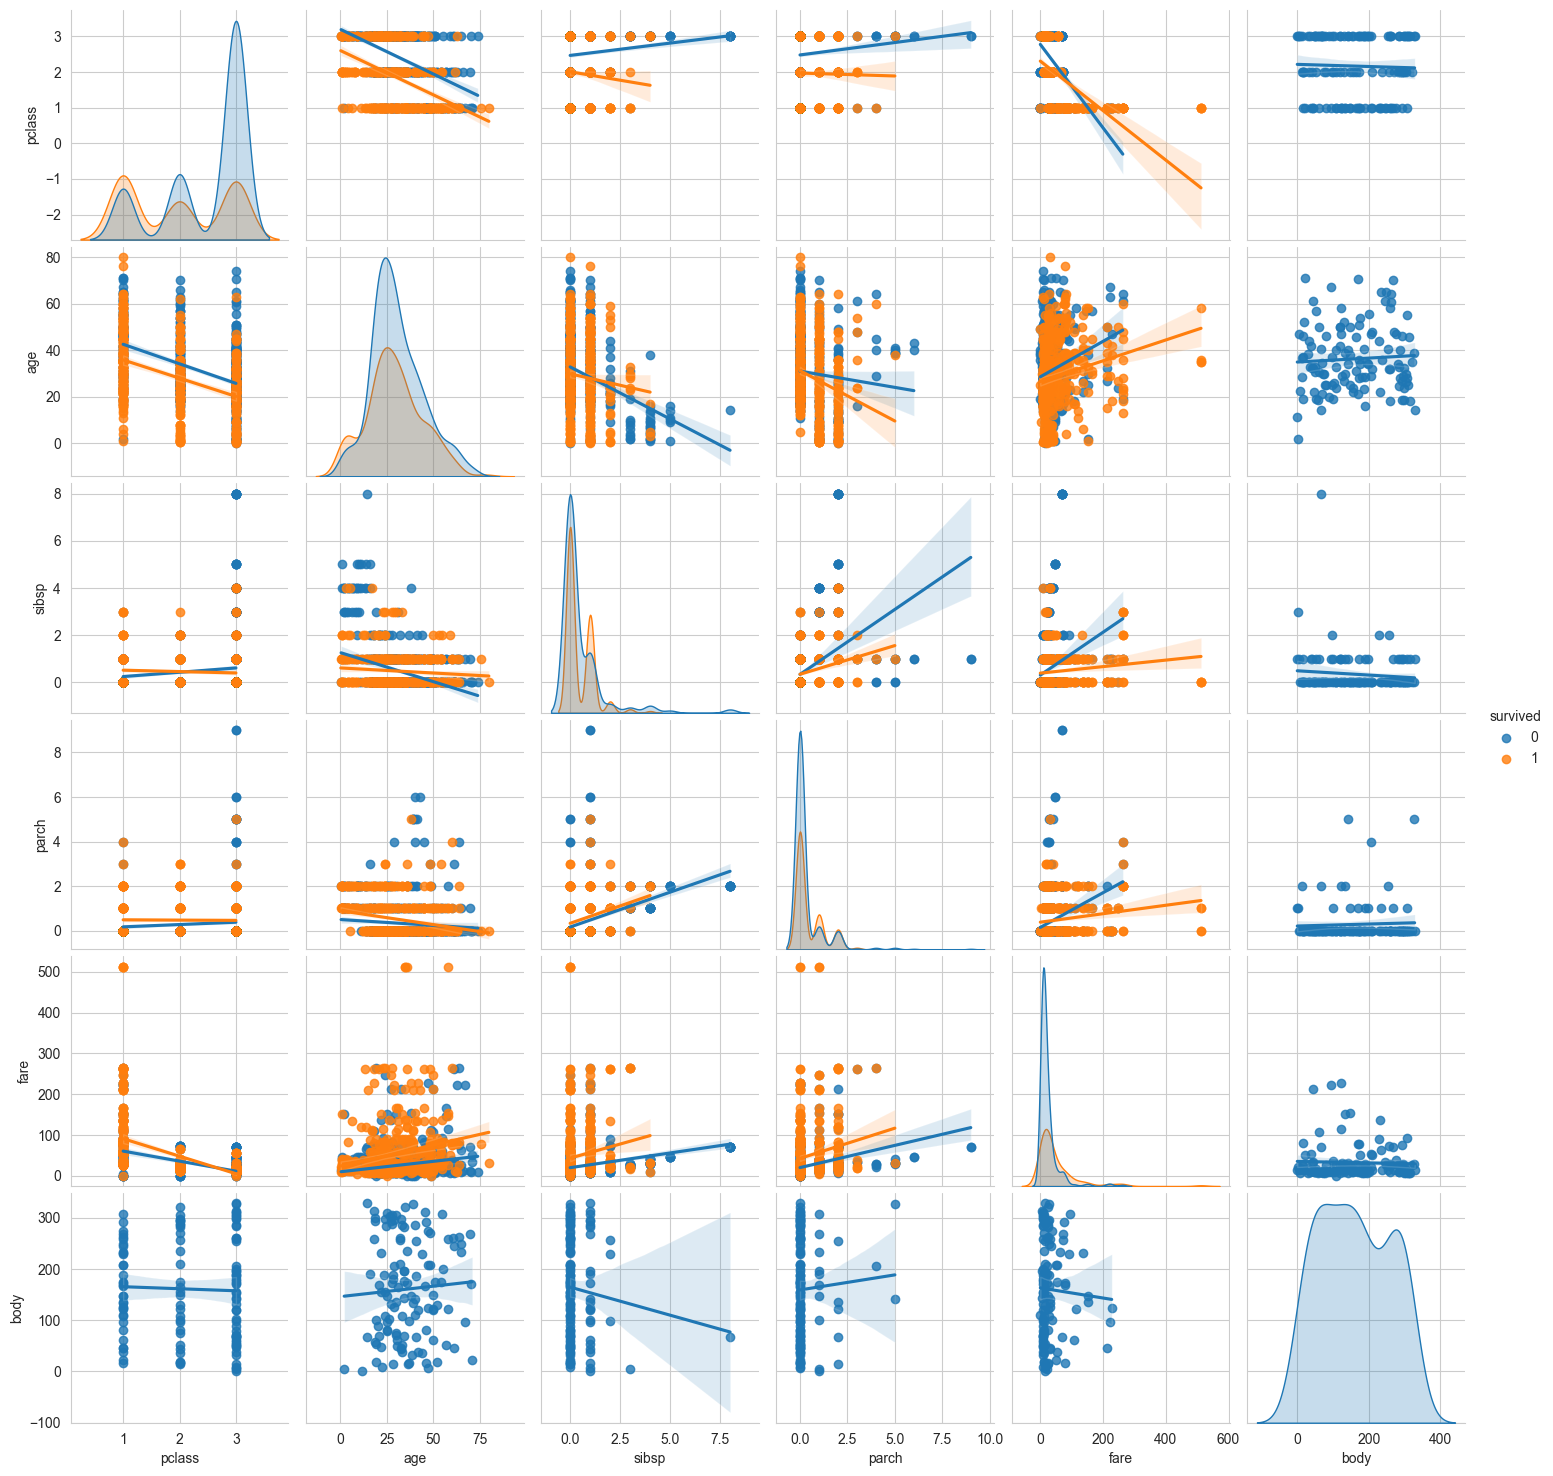

In [21]:
sns.pairplot(df_titanic,
             kind='reg', # {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             diag_kind='kde', # ‘hist’, ‘kde’,
             hue='survived',
             )

### Jointplot
Jointplots are useful to visualize the relationship between two numerical columns. We can use the `jointplot()` method from Seaborn which shows a scatter plot and the distribution of each variable. See the documentation for more options (https://seaborn.pydata.org/generated/seaborn.jointplot.html).


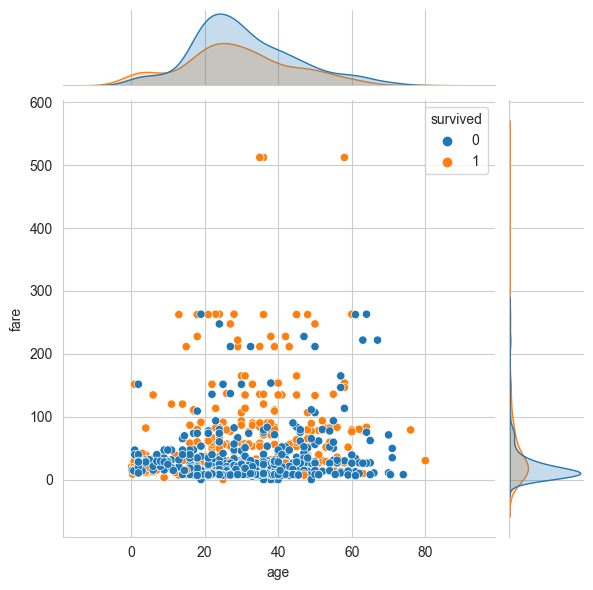

In [22]:
sns.jointplot(data=df_titanic,
              x='age', y='fare',
              hue='survived',
              kind='scatter' #{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
)

### Hexbin plot

Hexbin plots are useful to visualize the relationship between two numerical columns. We can use the `hexbin()` method from Pandas.

In [23]:
# not working on pandas 2.0.0?
# df_titanic[['age', 'fare']].dropna().plot.hexbin(x='age', y='fare', gridsize=20, figsize=(10, 4))

### Bubble plot

Bubble plots are useful to visualize the relationship between two numerical columns and a third numerical column. We can use the `scatter()` method from Pandas.

<Axes: xlabel='age', ylabel='fare'>

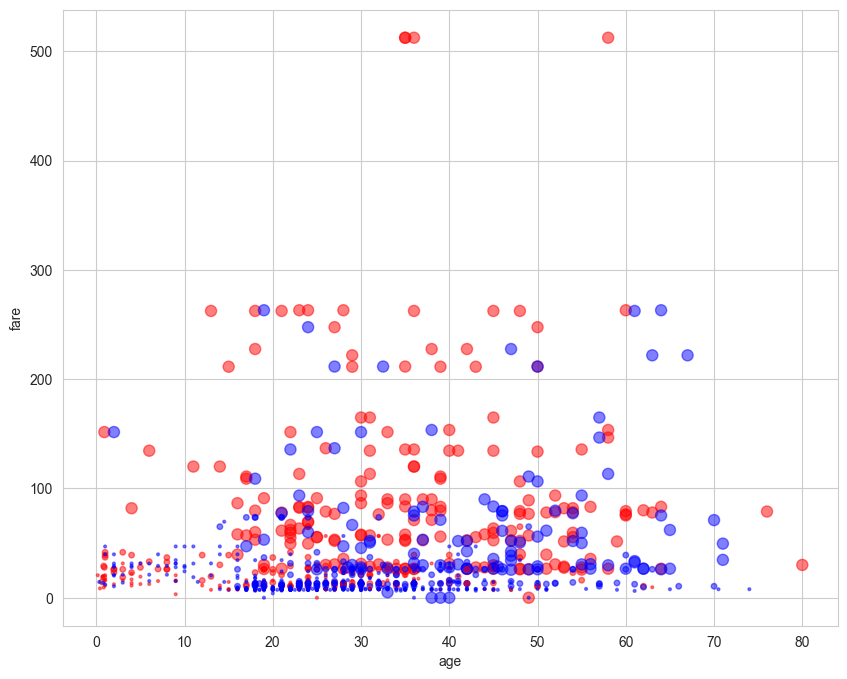

In [24]:
# df_titanic.plot.scatter(x='age', y='fare', s='pclass', figsize=(10, 8))
df_titanic.plot.scatter(x='age', y='fare',
                        s=4**(4-df_titanic['pclass']),
                        c=df_titanic['survived'].apply(lambda x: 'red' if x == 1 else 'blue'),
                        figsize=(10, 8),
                        alpha=0.5
                        )


## Data cleaning

Real-world datasets are typically characterized by their messy and noisy nature, which often results in numerous faulty or missing values. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

Data cleaning is a fundamental step in the data analysis process. The data cleaning process involves many steps, such as:
- Missing values treatment - remove or impute the missing values with values that are more representative of the data. E.g., the mean, the median, the mode, etc.

- Outliers treatment - remove or transform the outliers.
- Feature engineering - create new features from the existing features. E.g., create a new feature that is the sum or product of two other features.
- Feature selection - remove features that are not useful for the analysis. E.g., remove features that have a low correlation with the target variable if the goal is to predict the target variable.
- Feature scaling - scale the features to have the same range. E.g., scale the features to have values between 0 and 1. This is useful for some machine learning algorithms.
- Feature transformation - transform the features to have a more normal distribution. E.g., transform the features to have a normal distribution. This is useful for some machine learning algorithms.
- Feature discretization - discretize the features to have a more discrete distribution. E.g., transform real values to integer values. This is useful for some machine learning algorithms.
- Feature extraction - extract features from the data. E.g., extract features from text data. This is useful for some machine learning algorithms.
- Feature encoding - encode the features to have a more machine learning friendly format. E.g., encode the categorical features to have integer values.
- Feature reduction - reduce the number of features. E.g., reduce the number of features using PCA. This is useful for some machine learning algorithms.
- Feature aggregation - aggregate the features to have a more compact representation. E.g., aggregate the features using clustering. This is useful for some machine learning algorithms.

### Missing values treatment

Values that are not present in the data are referred to as missing values. They may be absent due to a variety of reasons, including human error, privacy concerns, or the failure of the survey respondent to complete the value. Missing values pose a significant challenge in data science and are typically addressed during data preprocessing. E.g., missing values can negatively impact the performance of machine learning models.

There are various methods to handle missing values, including **dropping** the records that contain missing values, manually **filling** in the missing values, using **measures of central tendency** such as mean, median, or mode to fill in the missing values, or employing **machine learning models** such as regression, decision trees, or KNNs to predict and fill in the missing values with the most probable value.

Let's see how many missing values we have in each column. First, we can use the `isnull()` method from Pandas to get a boolean dataframe with True for the missing values and False for the non-missing values. Then, we can use the sum() method to get the number of missing values in each column.

In [25]:
df = df_titanic.copy()

df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Similarly, we can use the `isna()` method from Pandas to get a boolean dataframe with True for the missing values and False for the non-missing values. Then, we can use the sum() method to get the number of missing values in each column.

In [26]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

#### Drop missing values

If we have a lot of data, we can drop the rows or columns that have missing values. We can use the `dropna()` method from Pandas to drop the rows or columns that have missing values. By default, the `dropna()` method drops the rows that have missing values. This will not work for the titanic dataset because every has at least one missing value, as we can see from the next cell.

In [27]:
df.dropna()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


Adding `axis=1` will drop the columns that have missing values.

In [28]:
df.dropna(axis=1)

,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,1,0,11755
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,1,0,PC 17485
3,1,1,"Francatelli, Miss. Laura Mabel",female,0,0,PC 17485
4,1,1,"Salomon, Mr. Abraham L",male,0,0,111163
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,1,0,2665
1305,3,0,"Zabour, Miss. Thamine",female,1,0,2665
1306,3,0,"Zakarian, Mr. Mapriededer",male,0,0,2656
1307,3,0,"Zakarian, Mr. Ortin",male,0,0,2670


#### Fill missing values

If we have a small dataset, we can fill the missing values with values that are more representative of the data. We can use the `fillna()` method from Pandas to fill the missing values with values that are more representative of the data. E.g., the mean, the median, the mode, etc.

For the age and fare columns, were 263 values are unknown, we can fill the missing values with the mean age and median fare. If the data was normally distributed, we could have used the mean or median, but when the data is not normally distributed, we should use the median. Have a look at the histograms and skew values of the age and fare columns to see that age is "more normally distributed" than the fare. So impirically, we can use the mean for the age and the median for the fare.

In [29]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

The embarked column is a categorical column, so we can fill the missing values with the most frequent value which is given by the mode.
For the embarked column, we can fill the missing values with the most frequent value which is given by the mode.

In [30]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

For the boat we can see that there are 823 missing values. This is because the boat column is only filled in for passengers who survived. We can fill the missing values with -1 as a value that represents that the passenger did not survive. We can also remove the boat column because if we think it is not useful for the analysis.

In [31]:
df['boat'].fillna(-1, inplace=True)

##### Shapiro-Wilk test for normality (Note)

To test the normality of the distribution we can use the Shapiro-Wilk test. The null hypothesis of the Shapiro-Wilk test is that the data is normally distributed. If the p-value is less than an $\alpha$ (e.g., a tipical value is $\alpha = 0.05$), we can reject the null hypothesis and conclude that the data is not normally distributed. Otherwise, we **can not** reject the null hypothesis and conclude that the data is normally distributed. Usually, the significance level is set to 0.05 (5%), implying that it is acceptable to have a 5% probability of incorrectly rejecting the true null hypothesis. Further,  $p$ is basically the probability of finding our data if the null hypothesis is true.

For our numerical variables, we can compute the p-values using the `shapiro()` function from the `scipy.stats` module. The `shapiro()` function returns the test statistic and the p-value. We can use the `select_dtypes()` method from Pandas to select only the numerical columns. Then, we can use a for loop to iterate over the numerical columns and print the p-value for each column. Further note the difference between original data and the data after filling the missing values.

In [32]:
from scipy.stats import shapiro

def test_shapiro(df):
    # for the numerical columns
    for col in df.select_dtypes(include=np.number).columns:
        p = shapiro(df[col].dropna())[1]
        if p < 0.05:
            print(f"p-value for {col}: {p} (reject the null hypothesis, i.e., the sample does not look like a normal distribution)")
        else:
            print(f"p-value for {col}: {p}  (null hypothesis is not rejectable, i.e., sample looks like a normal distribution)")

In [33]:
test_shapiro(df_titanic)

p-value for pclass: 4.833078403456294e-42 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for survived: 0.0 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for age: 5.7425529609300696e-11 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for sibsp: 0.0 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for parch: 0.0 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for fare: 0.0 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for body: 6.955199205549434e-05 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)


In [34]:
test_shapiro(df)

p-value for pclass: 4.833078403456294e-42 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for survived: 0.0 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for age: 4.709205401713391e-19 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for sibsp: 0.0 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for parch: 0.0 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for fare: 0.0 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for body: 6.955199205549434e-05 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)


See the Shapiro-Wilk test applied to some distributions in the next cell.

p-value for N: 0.6843085289001465  (null hypothesis is not rejectable, i.e., sample looks like a normal distribution)
p-value for U: 2.8233205410619427e-36 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for B: 3.0278843876629935e-09 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)
p-value for P: 2.001473402484253e-22 (reject the null hypothesis, i.e., the sample does not look like a normal distribution)


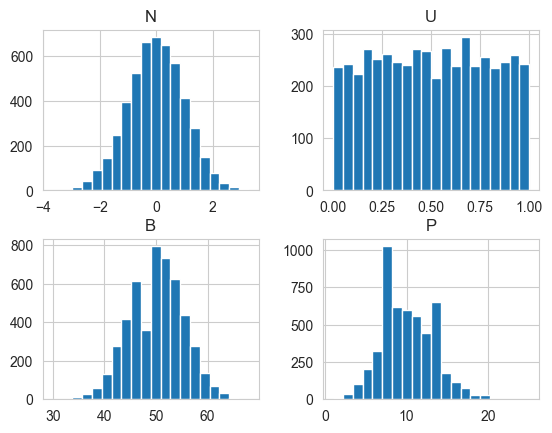

In [35]:
import numpy as np

k = 5000
df_NUBP =  pd.DataFrame({
    'N':np.random.normal(0, 1, k),
    'U':np.random.uniform(0, 1, k),
    'B':np.random.binomial(100, 0.5, k),
    'P':np.random.poisson(10, k),
})

# plot the histograms
df_NUBP.hist(bins=20)

# test the normality
test_shapiro(df_NUBP)


### Outliers treatment

Outliers are data points that are significantly different from the rest of the data. Outliers can be caused by measurement errors or by human errors. Outliers can have a significant impact on the analysis, so it is important to treat them. The outliers treatment can be done in two ways:
- Remove the outliers.
- Transform the outliers.

To identify outliers we can use, e.g., the following methods:
- Scatter plot - the scatter plot is a graphical representation of the relationship between two variables and it is used to identify outliers. The outliers are the data points that are far away from the rest of the data.
- Interquartile range / Boxplot - the boxplot is a graphical representation of the distribution of the data. The boxplot shows the median, the first quartile, the third quartile, the minimum, the maximum, and the outliers. The outliers are the data points that are outside the range $[Q_1 - 1.5 \cdot IQR, Q_3 + 1.5 \cdot IQR]$, where $Q_1$ is the first quartile, $Q_3$ is the third quartile, and $IQR = Q_3 - Q_1$ is the interquartile range.
- Percentile - the outliers are the data points that are outside the range $[P_{\alpha/2}, P_{100-\alpha/2}]$, where $P_{x}$ is the $x$-th percentile.
- Z-score - the z-score is a measure of how many standard deviations away from the mean a data point is. The outliers are the data points that have a z-score greater than 3 or less than -3.
- Isolation forest - the isolation forest is an unsupervised machine learning algorithm that is used to identify outliers. The outliers are the data points that are isolated from the rest of the data.
- Auto encoder - the auto encoder is an unsupervised machine learning algorithm that is used to identify outliers. The outliers are the data points that are not reconstructed well by the auto encoder.

Let us see some examples of outliers treatment.

#### Scatter plot

If we plot the scatter plot of the `sibsp` (Number of siblings/spouses aboard) and the `parch` (Number of Parents/Children Aboard), we can see that there are a possible outlier with a `parch` equal to 9 and `sibsp` equal to 1.

In [36]:
# copy the original dataframe
df = df_titanic.copy()

_ = df.plot_bokeh.scatter(x='sibsp', y='parch')

We can see thar there is a single family that fits the description of the outlier.

In [37]:
df[(df.parch == 9) & (df.sibsp == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1205,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1206,3,0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


By the ticket number, we can see the family's composition.

In [38]:
df[df.ticket == 'CA. 2343']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1196,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1197,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN
1198,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1199,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1200,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1201,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1202,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1203,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1204,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1205,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


####  Interquartile range / Boxplot

The boxplot is a graphical representation of the distribution of the data. The boxplot shows the median, the first quartile, the third quartile, the minimum, the maximum, and the outliers. The outliers are the data points that are outside the range $[Q_1 - 1.5 \cdot IQR, Q_3 + 1.5 \cdot IQR]$, where $Q_1$ is the first quartile, $Q_3$ is the third quartile, and $IQR = Q_3 - Q_1$ is the interquartile range.

Using the boxplot, we can see that there are outliers in the `age`, `sibsp`, `parch`, and `fare`.


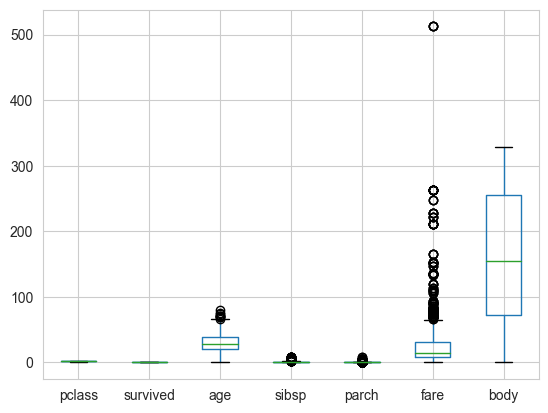

In [39]:
_ = df.boxplot()

For example, we can see those outliers in the `fare` feature.

In [40]:
def get_outliers_mask_IQR(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mask_outliers = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    return mask_outliers

mask_outliers = get_outliers_mask_IQR(df, 'fare')
outliers = df[mask_outliers]
outliers.sort_values(by='fare', ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
242,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
230,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
229,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
251,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
522,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,3,0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
381,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
386,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,NaN
370,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,8,NaN,"Isleworth, England"


Removing the outliers, we can see that the boxplot is more compact, although outliers are still visible.

<Axes: >

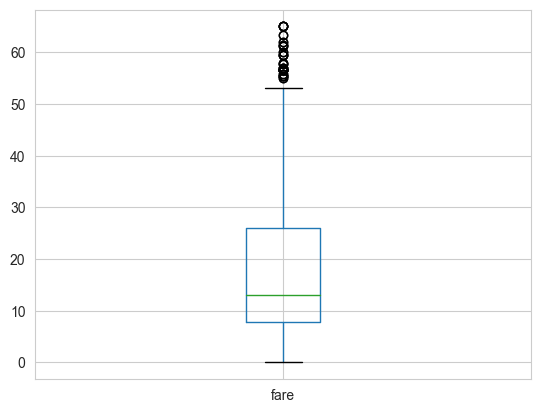

In [41]:
df.loc[~mask_outliers, ['fare']].boxplot()

The process of removing the outliers can be done iteratively, i.e., removing the outliers and then removing the outliers of the remaining data.

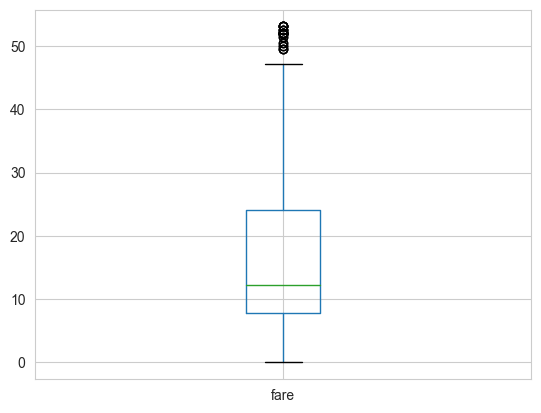

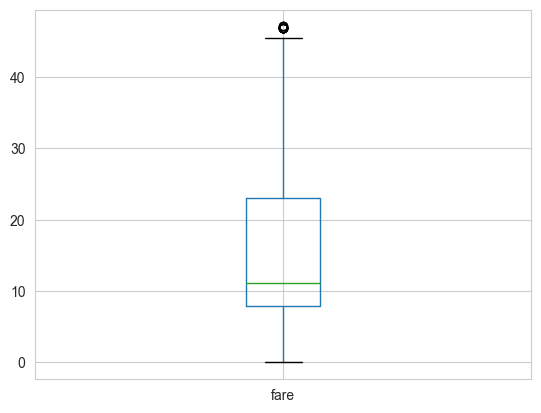

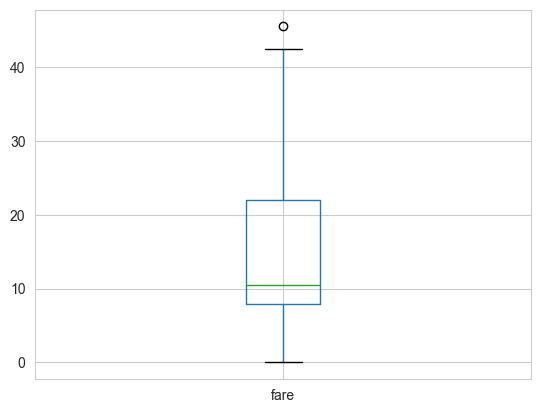

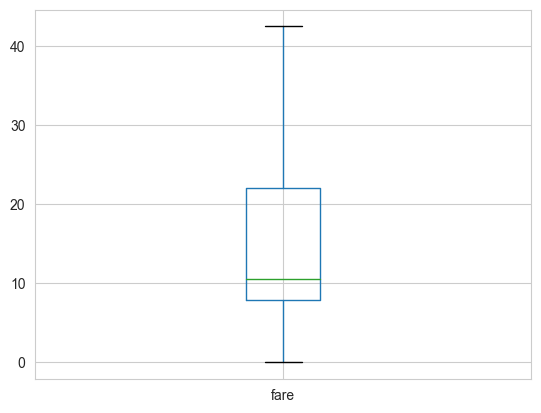

In [42]:
mask_outliers_it_2 = get_outliers_mask_IQR(df[~mask_outliers], 'fare')
while (mask_outliers_it_2.sum() > 0):
    # update the outliers mask
    mask_outliers = mask_outliers | mask_outliers_it_2
    # plot the boxplot of the remaining data
    df.loc[~mask_outliers, ['fare']].boxplot()
    plt.show()
    # get the outliers of the remaining data
    mask_outliers_it_2 = get_outliers_mask_IQR(df[~mask_outliers], 'fare')


#### Percentile

The outliers are the data points that are outside the range $[P_{\alpha/2}, P_{100-\alpha/2}]$, where $P_{x}$ is the $x$-th percentile.

In [43]:
def get_outliers_mask_percentile(df, feature, alpha=0.05):
    lower_bound = df[feature].quantile(alpha/2)
    upper_bound = df[feature].quantile(1-alpha/2)
    mask_outliers = (df[feature]<lower_bound) | (df[feature]>upper_bound)
    return mask_outliers

mask_outliers = get_outliers_mask_percentile(df, 'fare', 0.02)
outliers = df[mask_outliers]
outliers.sort_values(by='fare', ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
229,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
230,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
242,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
251,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
7,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
8,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
9,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
10,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
522,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
523,1,0,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"


#### Z-score

The Z-score of the outliers is a measure of how many standard deviations away from the mean a data point is. The outliers are the data points that have a z-score greater than 3 or less than -3, i.e., $z > 3$ or $z < -3$, where $z = \frac{x - \mu}{\sigma}$, $x$ is the data point, $\mu$ is the mean, and $\sigma$ is the standard deviation.

Let's see if there are outliers in the `age` feature using the z-score.

In [44]:
def get_outliers_mask_z_score(df, feature):
    lower_bound = df[feature].mean() - 3 * df[feature].std()
    upper_bound = df[feature].mean() + 3 * df[feature].std()
    mask_outliers = (df[feature]<lower_bound) | (df[feature]>upper_bound)
    return mask_outliers

mask_outliers = get_outliers_mask_z_score(df, 'fare')
outliers = df[mask_outliers]
outliers.sort_values(by='fare', ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
229,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
230,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
242,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
251,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
523,1,0,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
8,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
9,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
10,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
522,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
7,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"


array([[<Axes: title={'center': 'fare'}>]], dtype=object)

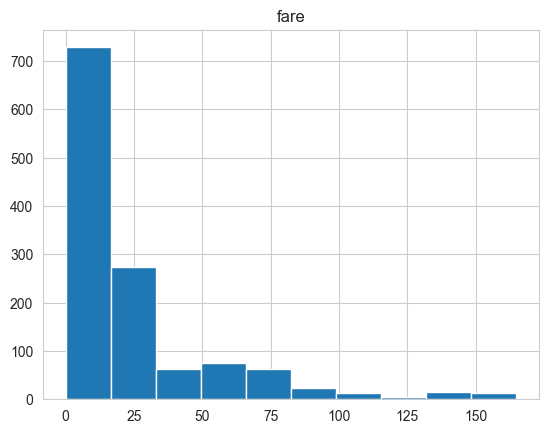

In [45]:
df.loc[~mask_outliers, ['fare']].hist()

As before, the process of removing the outliers can be done iteratively, i.e., removing the outliers and then removing the outliers of the remaining data.

By now, we have removed 71 outliers


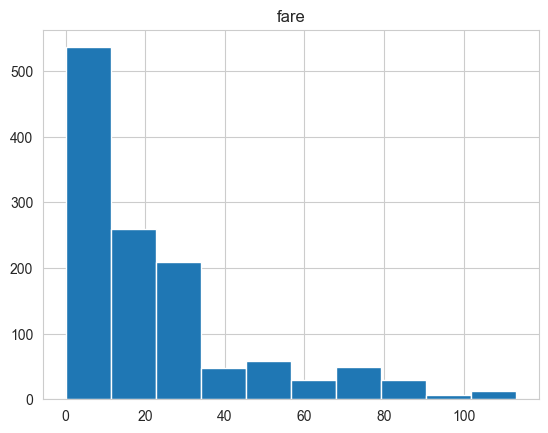

By now, we have removed 90 outliers


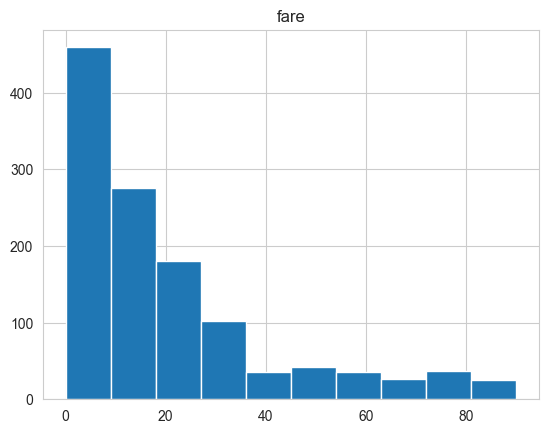

By now, we have removed 110 outliers


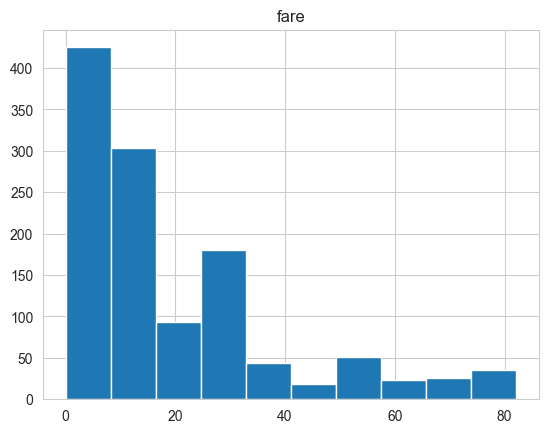

By now, we have removed 141 outliers


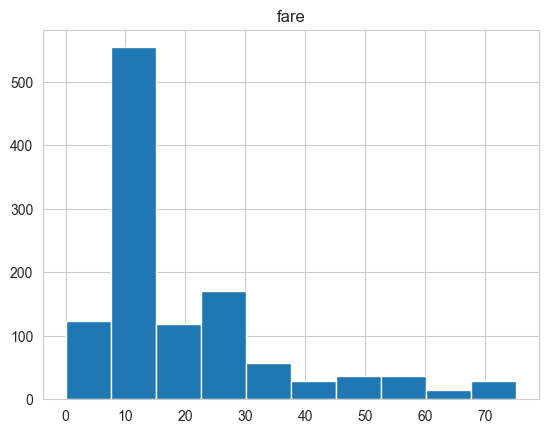

By now, we have removed 169 outliers


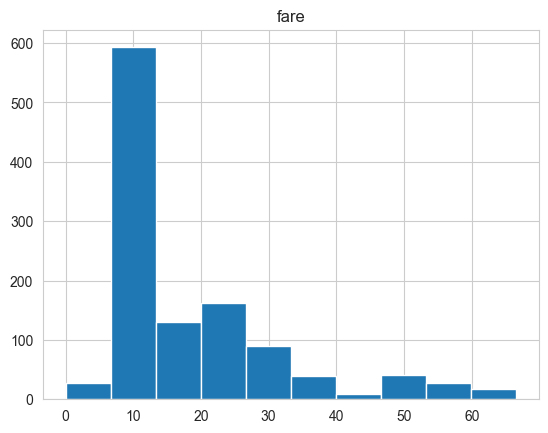

By now, we have removed 186 outliers


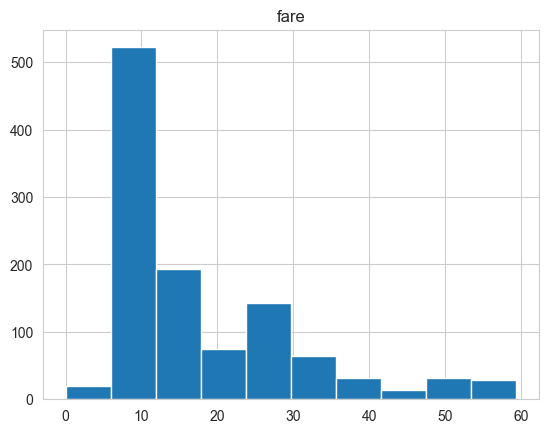

By now, we have removed 206 outliers


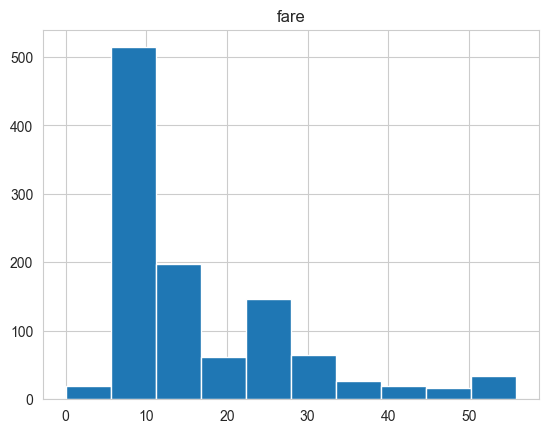

By now, we have removed 224 outliers


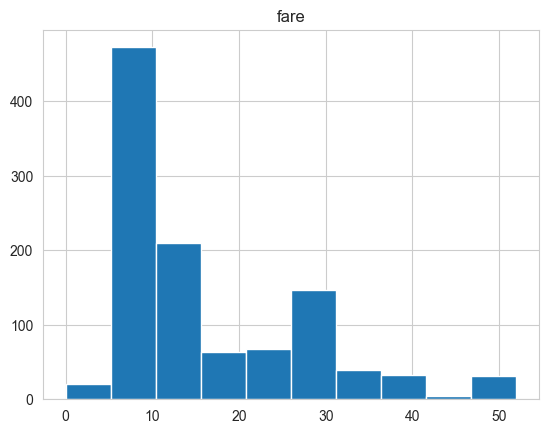

By now, we have removed 245 outliers


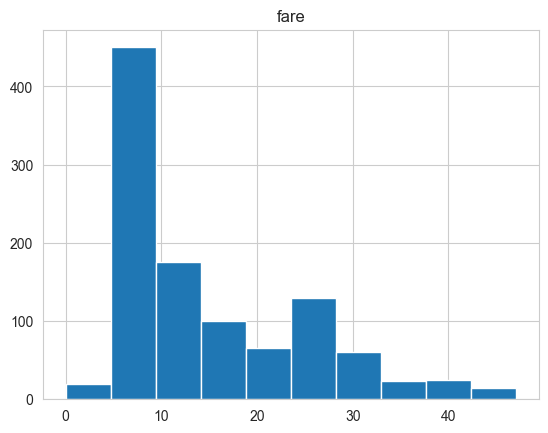

By now, we have removed 256 outliers


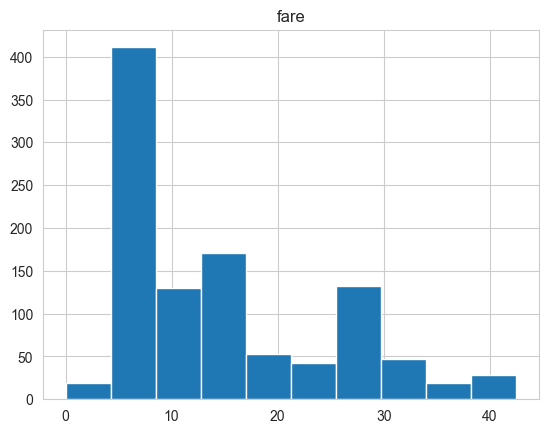

In [46]:
mask_outliers_it_2 = get_outliers_mask_z_score(df[~mask_outliers], 'fare')
while (mask_outliers_it_2.sum() > 0):
    # update the outliers mask
    mask_outliers = mask_outliers | mask_outliers_it_2
    print('By now, we have removed {} outliers'.format(mask_outliers.sum()))
    # plot the boxplot of the remaining data
    df.loc[~mask_outliers, ['fare']].hist()
    plt.show()
    # get the outliers of the remaining data
    mask_outliers_it_2 = get_outliers_mask_z_score(df[~mask_outliers], 'fare')



Maybe it was too much to remove all the outliers!

#### Isolation forest

Isoaltion forest is an unsupervised machine learning algorithm that is used to identify outliers. The outliers are the data points that are isolated from the rest of the data. The Isolation Forest process splits the data into smaller and smaller subsets until the data points are isolated. The less splits it takes to isolate a point, the more anomalous the point is.

![images/IF.png](images/IF.png)

Isolation forest is implemented in the `sklearn` library. Let's see how it works. We will use the `age` and `fare` features to identify the outliers, helping to graphically visualize the results. However, isolation forest can be used with any number of features.

In [47]:
from sklearn.ensemble import IsolationForest

df_for_if = df[['age', 'fare']].dropna().copy()

# fit the model where the contamination is the percentage of outliers
clf = IsolationForest(random_state=0, contamination=0.02)
clf.fit(df_for_if)

# predict the outliers
y_pred = clf.predict(df_for_if)
df_for_if['outlier'] = y_pred
df_for_if[df_for_if.outlier == -1].sort_values(by='fare', ascending=False)

/Users/pcardoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,age,fare,outlier
229,36.0000,512.3292,-1
230,58.0000,512.3292,-1
242,35.0000,512.3292,-1
251,35.0000,512.3292,-1
7,24.0000,263.0000,-1
10,60.0000,263.0000,-1
523,64.0000,263.0000,-1
522,19.0000,263.0000,-1
581,61.0000,262.3750,-1
272,48.0000,262.3750,-1


Let's see how the outliers are distributed in the `age` and `fare` features.

<Axes: xlabel='age', ylabel='fare'>

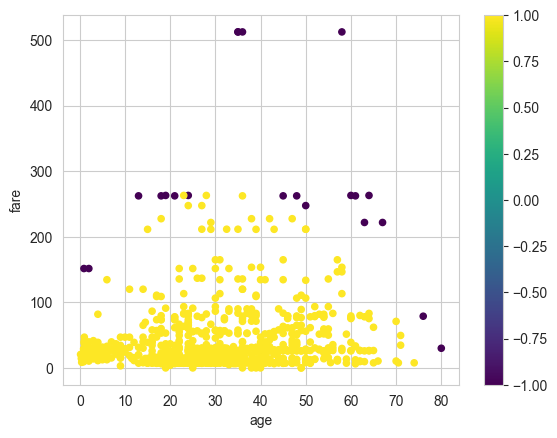

In [48]:
df[['age', 'fare']].dropna().plot.scatter(x='age', y='fare', c=df_for_if['outlier'], colormap='viridis')

#### Autoencoder

An autoencoder is a neural network that is used to learn the identity function. The autoencoder is trained to reconstruct the input data after passing through the hidden layers. The autoencoder is trained to minimize the reconstruction error, i.e., the difference between the input data and the reconstructed data. The outliers are the data points that are reconstructed with a high error.

![images/AE.png](images/AE.png)

In [49]:
list_of_features = ['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']
df_for_AE = df[list_of_features].dropna().copy()


# reproducibility with tensorflow
tf.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf

# define the model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(len(list_of_features), activation='linear'))

# compile the model
model.compile(optimizer='adam', loss='mse')

#normalize the data to have zero mean and unit variance -- this is important for the autoencoder and the reconstruction error
mu = df_for_AE.mean()
std = df_for_AE.std()
df_for_AE = (df_for_AE - mu) / std

# fit the model where the input and the output are the same
model.fit(df_for_AE, df_for_AE, epochs=20, verbose=1)

# predict the reconstructed data
y_pred = model.predict(df_for_AE)

Epoch 1/20
33/33 [==============================] - 1s 901us/step - loss: 0.9996
Epoch 2/20
33/33 [==============================] - 0s 740us/step - loss: 0.9915
Epoch 3/20
33/33 [==============================] - 0s 1ms/step - loss: 0.9401
Epoch 4/20
33/33 [==============================] - 0s 1ms/step - loss: 0.8142
Epoch 5/20
33/33 [==============================] - 0s 819us/step - loss: 0.7090
Epoch 6/20
33/33 [==============================] - 0s 831us/step - loss: 0.6529
Epoch 7/20
33/33 [==============================] - 0s 870us/step - loss: 0.6175
Epoch 8/20
33/33 [==============================] - 0s 1ms/step - loss: 0.5900
Epoch 9/20
33/33 [==============================] - 0s 853us/step - loss: 0.5675
Epoch 10/20
33/33 [==============================] - 0s 765us/step - loss: 0.5421
Epoch 11/20
33/33 [==============================] - 0s 775us/step - loss: 0.5075
Epoch 12/20
33/33 [==============================] - 0s 726us/step - loss: 0.4831
Epoch 13/20
33/33 [============

|Now, compute the reconstruction error by computing the euclidean distance between the original data and the reconstructed data.

In [50]:
reconstruction_error = df_for_AE - y_pred
reconstruction_error['error'] = reconstruction_error.apply(lambda x: np.sqrt(np.sum(np.square(x))), axis=1)
reconstruction_error

,age,fare,pclass,sibsp,parch,survived,error
0,-0.720891,0.831229,0.198021,-0.772266,-1.005729,0.258556,1.710139
1,-0.006543,-0.491999,-0.023046,0.985656,-0.036667,0.681946,1.296360
2,0.064248,-0.369946,0.057197,0.929389,-0.116537,0.617224,1.184302
3,-0.738599,-0.337420,-0.415029,-0.277338,-0.299423,0.784466,1.270271
5,0.249727,-0.377852,0.192522,0.972653,-0.047121,0.574863,1.233264
...,...,...,...,...,...,...,...
1301,1.015376,-0.134802,0.698438,-0.082200,-0.041487,-0.575476,1.369900
1304,-0.536144,0.319640,0.088113,0.351273,-0.512945,-0.577965,1.057323
1306,-0.033963,0.008499,0.318810,-0.149697,-0.017871,-0.527965,0.635878
1307,0.000312,0.006192,0.319461,-0.148665,-0.016905,-0.527910,0.634956


Then, identify the outliers by computing the quantile of the reconstruction error. Let us say that we want to remove the top 5% of the data points with the highest reconstruction error.

In [51]:
mask_outliers = reconstruction_error['error'] > reconstruction_error['error'].quantile(0.95)
reconstruction_error[mask_outliers].sort_values(by='error', ascending=False)

,age,fare,pclass,sibsp,parch,survived,error
948,2.243438,-0.669246,0.485282,-2.524425,3.746976,-0.834917,5.179387
947,2.053467,-0.674148,0.473792,-2.585153,3.696907,-0.825900,5.091948
1140,1.795584,-0.485564,0.517106,-2.607630,3.481852,-0.856647,4.835717
1175,1.666304,-0.589447,0.450143,-2.639525,3.489984,-0.802864,4.808151
251,-0.671106,3.030245,1.910309,-1.658532,-2.267421,-0.949013,4.698362
242,-0.671106,3.030245,1.910309,-1.658532,-2.267421,-0.949013,4.698362
160,1.720050,-1.431884,0.933017,-1.963367,2.816976,0.833641,4.285383
804,1.889774,-0.574155,0.359818,-2.008944,3.111696,-0.748799,4.278970
230,0.778083,2.564951,2.240800,-1.755273,-1.200442,-1.156282,4.250247
794,1.828543,-0.576024,0.355239,-2.030655,3.094620,-0.747494,4.249770


We can add a column to the original data frame identifying the outliers.

In [52]:
df_for_AE['outlier'] = 1
df_for_AE.loc[mask_outliers, 'outlier'] = -1
df_for_AE

,age,fare,pclass,sibsp,parch,survived,outlier
0,-0.059200,3.133743,-1.433914,-0.551633,-0.501222,1.202465,1
1,1.261235,0.052284,-1.433914,0.544292,-0.501222,1.202465,1
2,1.330732,0.363219,-1.433914,0.544292,-0.501222,1.202465,1
3,0.010297,0.363219,-1.433914,-0.551633,-0.501222,1.202465,1
5,1.678215,0.336529,-1.433914,0.544292,-0.501222,1.202465,1
...,...,...,...,...,...,...,...
1301,1.087494,-0.528615,0.942676,-0.551633,-0.501222,-0.830829,1
1304,-1.066900,-0.398903,0.942676,0.544292,-0.501222,-0.830829,1
1306,-0.232941,-0.528615,0.942676,-0.551633,-0.501222,-0.830829,1
1307,-0.198193,-0.528615,0.942676,-0.551633,-0.501222,-0.830829,1


Now we can plot the outliers in the `age` and `fare` features, as before.

<Axes: xlabel='age', ylabel='fare'>

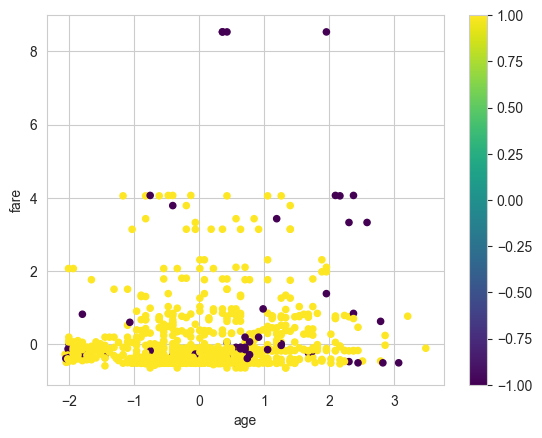

In [53]:
df_for_AE[['age', 'fare']].dropna().plot.scatter(x='age', y='fare', c=df_for_AE['outlier'], colormap='viridis')

## Feature encoding
Feature encoding is the process of transforming the features to have a more machine learning friendly format. For example, categorical features are transformed to have integer values. This is useful for some machine learning algorithms.

### One-hot encoding

One-hot encoding is the process of transforming the features to have a more machine learning friendly format. For example, categorical features are split into multiple binary features.

In [54]:
df = df_titanic.copy()
encoded_data = pd.get_dummies(df[['embarked', 'sex']],
                              dtype=int # default is bool
                              )

encoded_data

In [55]:
# add the encoded data to the original data frame
df = pd.concat([df, encoded_data], axis=1)
df

### Label encoding
Label encoding is the process of transforming the features to have a more machine learning friendly format. For example, categorical features are transformed to have integer values.

Let us encode the `embarked` feature.

In [56]:
from sklearn.preprocessing import LabelEncoder

# copy the data frame
df = df_titanic.copy()

# encode the embarked feature
le = LabelEncoder()
df['embarked'] = le.fit_transform(df['embarked'])

df

The `LabelEncoder` class has a `classes_` attribute that contains the list of classes that were encoded.

In [57]:
le.classes_

### Ordinal encoding

Ordinal encoding is similar to label encoding, but the classes are ordered. For example, the classes `low`, `medium`, and `high` can be encoded as `0`, `1`, and `2`, respectively.

## Feature scaling

In practical scenarios, features often have distinct ranges, magnitudes, and units. For instance, age may vary between 0 and 120, while salary can fluctuate between zero and thousands or even millions. This raises the question of how data analysts or scientists can compare such features, given that they are on different scales. It is worth noting that high-magnitude features tend to have a more significant impact on machine learning models than lower magnitude ones. Fortunately, feature scaling or normalization can help address these issues.

So, feature scaling refers to the process of bringing all features to the same magnitude level. It is not mandatory for all algorithms, but some algorithms necessitate scaled data, such as those that depend on Euclidean distance measures, like K-nearest neighbor and K-means clustering algorithms.

### Standard scaling
Standard scaling is the process of transforming the features to have a more normal distribution. The standard scaling is performed by subtracting the mean and dividing by the standard deviation., i.e., $$x_{scaled} = \frac{x - \mu}{\sigma}$$

In [58]:
from sklearn.preprocessing import StandardScaler

# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# standard scaling
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='standard scaled data', ax=ax[1])

### Min-max scaling

Min-max scaling is the process of transforming the features to have a more uniform distribution. The min-max scaling to the [0, 1] interval is performed by subtracting the minimum and dividing by the range., i.e., $$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}.$$

To transform the data to the $[a, b]$ interval, we can use the following formula: $$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}  (b - a) + a.$$

In [60]:
from sklearn.preprocessing import MinMaxScaler

# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# min-max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

df

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='min-max scaled data', ax=ax[1])

### Robust scaling
Robust scaling features in a way that accounts for outliers. The method achieves this by first removing the median and then scaling the data based on the quantile range. The default quantile range used is the Interquartile Range (IQR), although it can be customized if needed.

During the scaling process, each feature is centered and scaled independently by computing relevant statistics from the training set. Outliers can often skew the sample mean and variance in undesirable ways.

So, robust scaling is computed as follows:
 $$x_{scaled} = \frac{x - \text{median}(x)}{\text{IQR}(x)},$$
where $\text{median}(x)$ is the median of the feature $x$, and $\text{IQR}(x)$ is the interquartile range of the feature $x$.

In [62]:
from sklearn.preprocessing import RobustScaler

# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# robust scaling
scaler = RobustScaler()
df[features] = scaler.fit_transform(df[features])

df

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='robust scaled data', ax=ax[1])

## Feature transformation
Feature transformation is the process of transforming the features allows, for exameple, reducing the skewness of the features, the effect of outliers, etc. Examples feature transformations are log transformation, square root transformation, square, etc.

If the feature is right-skewed or positively skewed or grouped at lower values, then we can apply the square root, cube root, and logarithmic transformations, while if the feature is left-skewed or negative skewed or grouped at higher values, then we can apply the cube, square, and so on.

### Log transformation

The log transformation is performed by taking the logarithm of the feature., i.e., $$x_{log} = \log(x).$$

In [64]:
from scipy import stats

# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# log transformation
df[features] = df[features].apply(lambda x: np.log(x + 1))

df

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='log scaled data', ax=ax[1])

### Square root transformation
Square root transformation is performed by taking the square root of the feature., i.e., $$x_{sqrt} = \sqrt{x}.$$

In [66]:
# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# square transformation
df[features] = df[features].apply(lambda x: np.sqrt(x))

df

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_titanic[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='original data', ax=ax[0])
df[['age', 'fare']].plot.hist(alpha=0.5, bins=20, title='log scaled data', ax=ax[1])

### Discretization transformation
Discretization transformation is performed by transforming numerical features to categorical features. This is useful for some machine learning algorithms. For example, the following code transforms the age feature to a categorical feature.

To do this, we use the `pd.cut` function. The `pd.cut` function takes as input the feature to be transformed, the bins, and the labels. The bins are the intervals in which the feature will be transformed. The labels are the names of the categories.

In [68]:
# copy the data frame
df = df_titanic.copy()

# select the features
features = ['age', 'fare']

# discretization transformation
df['age category'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 100], labels=['child', 'young', 'adult', 'senior'])

df

In [69]:
df.groupby('age category')['age'].count().plot.bar()

## Feature splitting
Feature splitting is the process of splitting a feature into multiple features. For example, some times is possible to split the `name` feature into two features: `first name` and `last name`. Or the spliting of a `date` feature into three features: `year`, `month`, and `day`.

In the Titanic dataset, we can split the cabin feature into two features: `cabin number` and `cabin letter`. The latter corresponds to the deck of the Titanic. Furhter, some passenger have more than one cabin. In this case, we can split the cabin feature into multiple features, one for each cabin.

In [70]:
# copy the data frame
df = df_titanic.copy()

# select the features
features = ['cabin']

# feature splitting
df['cabin number'] = df['cabin'].str.extract('(\d+)')
df['deck'] = df['cabin'].str.extract('([A-Z])')
df['number of cabins'] = df['cabin'].str.split().str.len()

df

And now it can be interesting to see the distribution of the passenger class in different decks. This can be done using the `groupby` function and the `unstack` function.

In [71]:
df.groupby('deck')['pclass'].value_counts().unstack().plot.bar()

Or we can see the distribution of the passenger class in different decks using the `pivot_table` function.

In [72]:
df.pivot_table(index='deck', columns='pclass', aggfunc='size', fill_value=0).plot.bar()

Another thing we can check is the correlation between the number of cabins and the passenger class or the fare. We can see that the number of cabins is highly correlated fare but not with the passenger class.

In [73]:
df[['number of cabins', 'pclass', 'fare']].corr()

We can also see the distribution of the mean fare in different passenger classes and number of cabins.

In [74]:
df.pivot_table(index='pclass', columns='number of cabins', values='fare', aggfunc='mean')#.plot.bar()

### Regular expression in a nutshell

Regular expressions are a powerful tool for string manipulation. They are used to find, replace, and split strings. They are also used to extract information from strings. For example, we can extract the title of the passenger from the name feature (as we'll see later).

So, a regular expression (regex) is a pattern used to match character combinations in strings. Here's a nutshell tutorial on regular expressions:
- Matching characters: You can match specific characters by simply including them in the pattern. For example, the pattern cat matches the characters "c", "a", and "t".
- Character classes: You can match a set of characters by using character classes. For example, the pattern [abc] matches any of the characters "a", "b", or "c".
- Metacharacters: Certain characters have a special meaning in regex patterns. For example, the dot "." matches any character except a newline, and the asterisk "*" matches zero or more occurrences of the previous character.
- Anchors: Anchors are used to match the position of a string. The caret "^" matches the start of a string, and the dollar sign "$" matches the end of a string.
- Quantifiers: Quantifiers are used to specify how many times a character or group of characters should appear. For example, the pattern a{3} matches exactly three occurrences of the letter "a", and the pattern a{3,5} matches three to five occurrences of the letter "a".
- Alternation: Alternation is used to match one of several possible patterns. For example, the pattern cat|dog matches either "cat" or "dog".
- Grouping: Grouping is used to group parts of a pattern together. This is useful for applying quantifiers or alternation to a group of characters. For example, the pattern (ab)+ matches one or more occurrences of the string "ab".
- "\d" is a metacharacter that represents any digit from 0 to 9. It is commonly used to match numbers in text, and it is equivalent to the character class [0-9].
- [a-z] is a character class that matches any lowercase letter from "a" to "z". It represents a range of characters between "a" and "z" inclusive. For example, the pattern c[a-z]t matches any three-letter word that starts with "c" and ends with "t", where the middle letter can be any lowercase letter. This would match words such as "cat", "cet", "cxt", and so on. Some more exaples: The pattern [a-z]+ matches one or more consecutive lowercase letters; The pattern [a-z]{3} matches exactly three consecutive lowercase letters; The pattern ^[a-z]+$ matches a string that consists entirely of lowercase letters; You can also use other character classes in regular expressions to match other types of characters, such as uppercase letters ([A-Z]), digits (\d), whitespace (\s), or non-word characters (\W).

See https://docs.python.org/3/library/re.html for more information on the Python regular expression module.

Let me give you an example.

In [75]:
import re
name = 'Braund, Mr. Owen Harris'

def print_regex_result(explanation, name, regex):
    print(re.findall(regex, name), ":", explanation)

print_regex_result('title, extracted considering the dot', name, '([A-Za-z]+)\.', )
print_regex_result('title, extracted considering the comma', name, ',\s([A-Za-z]+)')
print_regex_result('last name, extracted considering the comma', name, '([A-Za-z]+),')
print_regex_result( 'first name, extracted considering the space', name, '([A-Za-z]+)\s')
print_regex_result('first name and posterior name, extracted considering the space between words', name, '([A-Za-z]+)\s([A-Za-z]+)')
print_regex_result('list of words', name, '([A-Za-z]+)')
print_regex_result('list of words', name, '(\w+)')
print_regex_result('list of words after Mr.', name, '\.\s(\w+)\s(\w+)')


## Feature engineering
Feature engineering includes the creation of new features from the existing features, the selection of features, the extraction of features, the reduction of features, and the aggregation of features. We already saw how to create new features from the existing features, by extracting the deck from the cabin feature.

As another example, we can create a new columns with the title and last name of the passenger.

In [76]:
# copy the data frame
df = df_titanic.copy()

# select the features
features = ['name']

# feature engineering
df['title'] = df['name'].str.extract('([A-Za-z]+)\.')
# df['title'] = df['name'].str.extract(', ([A-Za-z]+)')

df['last name'] = df['name'].str.extract('([A-Za-z]+),')

df

## Feature selection
In feature selection we select the features that are useful for the analysis. We can select the features using the correlation with the target variable. For example, we can select the features that have a correlation with the target variable greater than 0.1 to predict the survival of the passenger.

In [77]:
# select the numerical features
df = df_titanic.select_dtypes(include=np.number)

# compute the correlation with the target variable
df.corr()['survived'].abs().sort_values(ascending=False)

# References

- Campesato, O. (2018). Regular expressions: Pocket primer. Mercury Learning and Information.
- https://www.kaggle.com/learn/pandas
- Navlani, A.,  Fandango, A.,  Idris, I. (2021). Python Data Analysis: Perform data collection, data processing, wrangling, visualization, and model building using Python. Packt. 3rd Edition
- Brandt. S. (2014). Data Analysis: Statistical and Computational Methods for Scientists and Engineers. Springer. 4th Edition
- https://eugenelohh.medium.com/data-analysis-on-the-titanic-dataset-using-python-7593633135f2